### Import libraries

In [35]:
import os
import numpy as np
import pandas as pd
from pandas import MultiIndex, Int16Dtype
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare Data

In [34]:
training_data_dir = os.path.join('data', 'Training')

In [35]:
path_li = os.listdir(training_data_dir)

In [36]:
path_li

['no_tumor',
 '.DS_Store',
 'meningioma_tumor',
 'glioma_tumor',
 'pituitary_tumor']

In [37]:
classes = {'no_tumor': 0, 'meningioma_tumor': 1, 'glioma_tumor': 1, 'pituitary_tumor': 1}

In [38]:
classes

{'no_tumor': 0, 'meningioma_tumor': 1, 'glioma_tumor': 1, 'pituitary_tumor': 1}

In [39]:
X = []
Y = []

for cls in classes:
    path = os.path.join(training_data_dir, cls)
    
    for j in os.listdir(path):
        img = cv2.imread(os.path.join(path, j), 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [40]:
X = np.array(X)
Y = np.array(Y)

Visualize Data

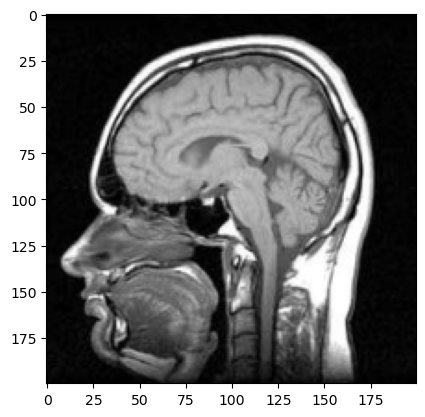

In [41]:
plt.imshow(X[1], cmap='gray')

### Prepare Data

In [42]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

### Split Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state=10, test_size=0.2)

In [44]:
X_train.shape, X_test.shape

((2296, 40000), (574, 40000))

### Feature Scaling

In [45]:
X_train = X_train/255
X_test = X_test/255

### Train the Model

In [47]:
import xgboost as xgb
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=50, learning_rate=0.1)
cb.fit(X_train, y_train)

0:	learn: 0.5727280	total: 3.31s	remaining: 2m 42s
1:	learn: 0.4486616	total: 6.63s	remaining: 2m 39s
2:	learn: 0.3583821	total: 9.69s	remaining: 2m 31s
3:	learn: 0.2890422	total: 12.7s	remaining: 2m 26s
4:	learn: 0.2495299	total: 15.8s	remaining: 2m 22s
5:	learn: 0.2207105	total: 18.9s	remaining: 2m 18s
6:	learn: 0.1963367	total: 22.1s	remaining: 2m 15s
7:	learn: 0.1803226	total: 24.9s	remaining: 2m 10s
8:	learn: 0.1676767	total: 27.8s	remaining: 2m 6s
9:	learn: 0.1509626	total: 30.8s	remaining: 2m 3s
10:	learn: 0.1389421	total: 33.9s	remaining: 2m
11:	learn: 0.1311229	total: 36.8s	remaining: 1m 56s
12:	learn: 0.1240342	total: 39.9s	remaining: 1m 53s
13:	learn: 0.1203638	total: 43.1s	remaining: 1m 50s
14:	learn: 0.1131273	total: 46.1s	remaining: 1m 47s
15:	learn: 0.1071742	total: 49.3s	remaining: 1m 44s
16:	learn: 0.1032501	total: 52.1s	remaining: 1m 41s
17:	learn: 0.0993839	total: 55.1s	remaining: 1m 37s
18:	learn: 0.0963945	total: 58.2s	remaining: 1m 34s
19:	learn: 0.0935824	total: 

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(base_estimator=cb)
ab.fit(X_train, y_train)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


0:	learn: 0.4876115	total: 2.51s	remaining: 2m 3s
1:	learn: 0.3728945	total: 5.54s	remaining: 2m 12s
2:	learn: 0.2939063	total: 8.33s	remaining: 2m 10s
3:	learn: 0.2375281	total: 11.2s	remaining: 2m 8s
4:	learn: 0.2016663	total: 14.7s	remaining: 2m 12s
5:	learn: 0.1766193	total: 18.5s	remaining: 2m 15s
6:	learn: 0.1508557	total: 21.3s	remaining: 2m 10s
7:	learn: 0.1356246	total: 24.1s	remaining: 2m 6s
8:	learn: 0.1209424	total: 27.2s	remaining: 2m 3s
9:	learn: 0.1104250	total: 30.2s	remaining: 2m
10:	learn: 0.1030282	total: 33.7s	remaining: 1m 59s
11:	learn: 0.0978317	total: 37.5s	remaining: 1m 58s
12:	learn: 0.0926814	total: 41.4s	remaining: 1m 57s
13:	learn: 0.0870016	total: 45s	remaining: 1m 55s
14:	learn: 0.0816085	total: 48.9s	remaining: 1m 54s
15:	learn: 0.0784675	total: 52.4s	remaining: 1m 51s
16:	learn: 0.0755164	total: 56.6s	remaining: 1m 49s
17:	learn: 0.0713697	total: 1m	remaining: 1m 48s
18:	learn: 0.0688162	total: 1m 3s	remaining: 1m 44s
19:	learn: 0.0658471	total: 1m 7s	r

AdaBoostClassifier(base_estimator=<catboost.core.CatBoostClassifier object at 0x296215a60>)

### Apply SHAP algorithm

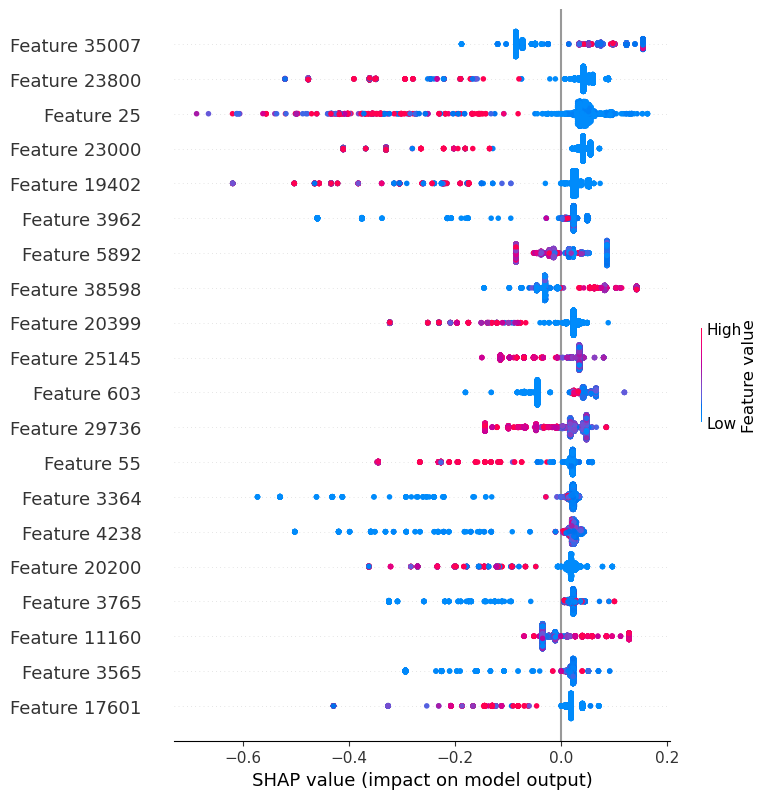

In [78]:
import shap

# explain the model's predictions using SHAP values
explainer = shap.Explainer(cb)
shap_values = explainer(X_train)

# plot the feature importance
shap.summary_plot(shap_values, X_train)

### Evaluation

In [49]:
print("Training Score:", cb.score(X_train, y_train))
print("Testing Score:", cb.score(X_test, y_test))

Training Score: 0.9973867595818815
Testing Score: 0.9599303135888502


In [50]:
print("Training Score:", ab.score(X_train, y_train))
print("Testing Score:", ab.score(X_test, y_test))

Training Score: 1.0
Testing Score: 0.9564459930313589


In [51]:
from sklearn.metrics import accuracy_score

y_pred = ab.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9564459930313589


In [52]:
from sklearn.metrics import confusion_matrix

y_pred = ab.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[ 79  12]
 [ 13 470]]


In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = ab.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.975103734439834
Recall: 0.9730848861283644
F1 Score: 0.9740932642487047


### Test Model

In [72]:
label = {0: 'No Tumor', 1:'Have Tumor'}

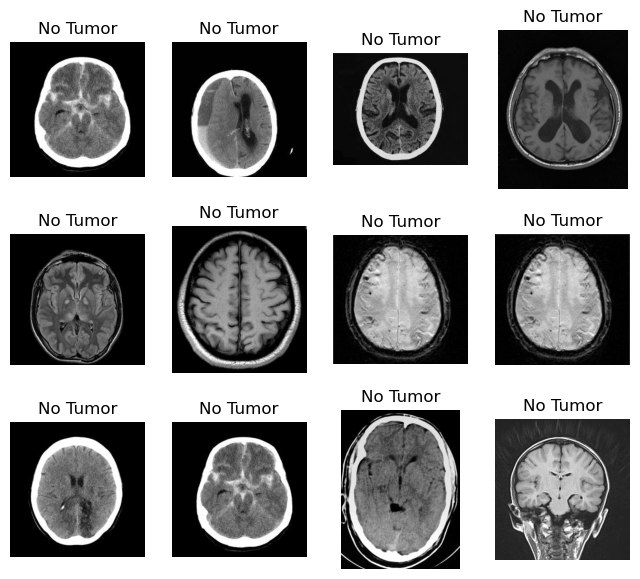

In [73]:
plt.figure(figsize=(8, 7))
p = os.listdir(os.path.join('data', 'Testing', 'no_tumor'))

c = 1
for i in p[:12]:
    plt.subplot(3,4,c)
    
    img = cv2.imread(os.path.join('data', 'Testing', 'no_tumor', i), 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1)/255
    pred = ab.predict(img1)
    
    plt.title(label[pred[0]])
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    c+=1

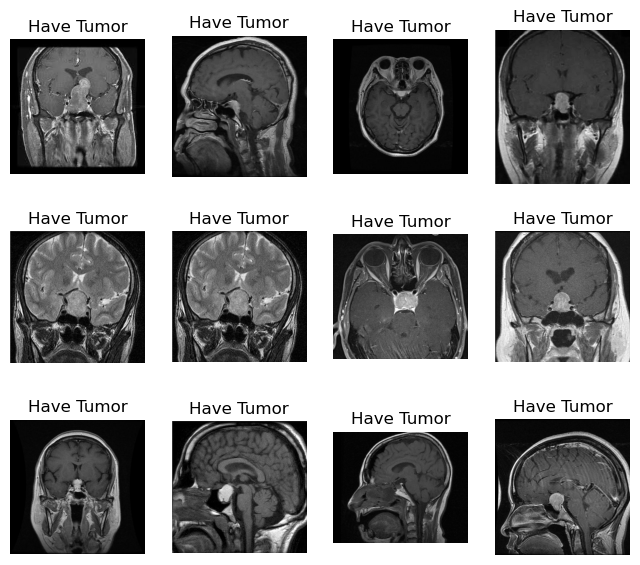

In [74]:
plt.figure(figsize=(8, 7))
p = os.listdir(os.path.join('data', 'Testing', 'pituitary_tumor'))

c = 1
for i in p[:12]:
    plt.subplot(3,4,c)
    
    img = cv2.imread(os.path.join('data', 'Testing', 'pituitary_tumor', i), 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1)/255
    pred = ab.predict(img1)
    
    plt.title(label[pred[0]])
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    c+=1

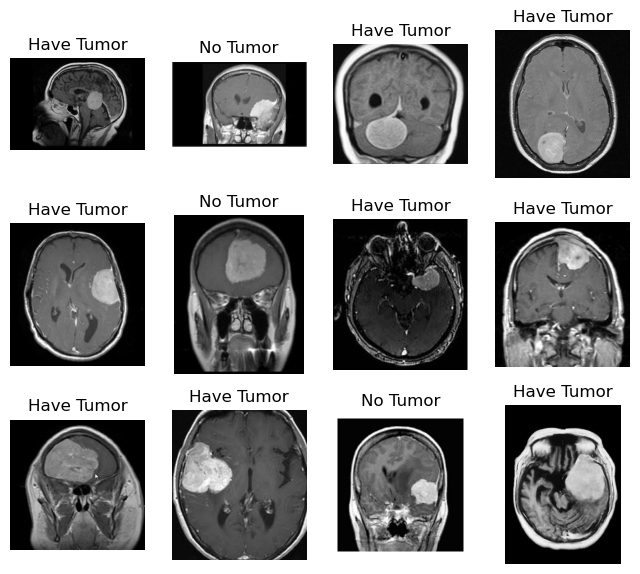

In [75]:
plt.figure(figsize=(8, 7))
p = os.listdir(os.path.join('data', 'Testing', 'meningioma_tumor'))

c = 1
for i in p[:12]:
    plt.subplot(3,4,c)
    
    img = cv2.imread(os.path.join('data', 'Testing', 'meningioma_tumor', i), 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1)/255
    pred = ab.predict(img1)
    
    plt.title(label[pred[0]])
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    c+=1

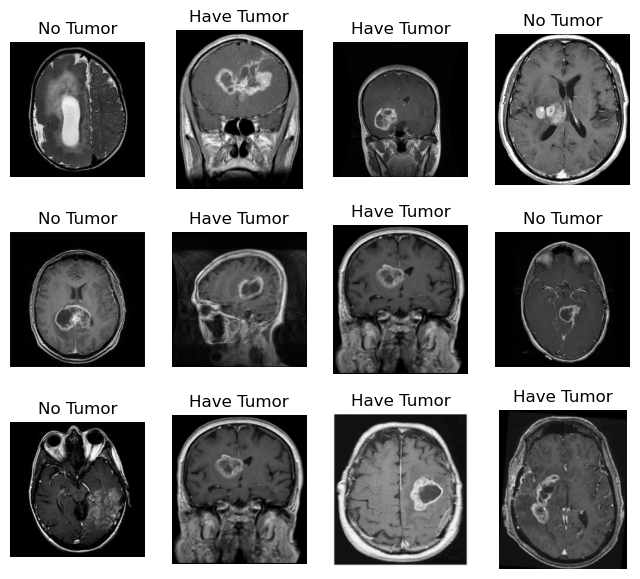

In [76]:
plt.figure(figsize=(8, 7))
p = os.listdir(os.path.join('data', 'Testing', 'glioma_tumor'))

c = 1
for i in p[:12]:
    plt.subplot(3,4,c)
    
    img = cv2.imread(os.path.join('data', 'Testing', 'glioma_tumor', i), 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1)/255
    pred = ab.predict(img1)
    
    plt.title(label[pred[0]])
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    c+=1